# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint 
#from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric" + '&appid=' + weather_api_key + '&q='

In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
    
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Latitude": city_lat, 
                          "Longitude": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

 
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | hawaiian paradise park
Processing Record 7 of Set 1 | at taj
Processing Record 8 of Set 1 | ust-nera
Processing Record 9 of Set 1 | vorgashor
Processing Record 10 of Set 1 | fuerte olimpo
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | mandera
Processing Record 13 of Set 1 | crucecita
Processing Record 14 of Set 1 | aldan
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | ulimang
Processing Record 17 of Set 1 | road town
Processing Record 18 of Set 1 | as sulayyil
Processing Record 19 of Set 1 | wailea
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 

Processing Record 39 of Set 4 | walvis bay
Processing Record 40 of Set 4 | papatowai
Processing Record 41 of Set 4 | olyokminsk
Processing Record 42 of Set 4 | nogliki
Processing Record 43 of Set 4 | vila velha
Processing Record 44 of Set 4 | kingston
Processing Record 45 of Set 4 | pangoa
Processing Record 46 of Set 4 | kudymkar
Processing Record 47 of Set 4 | san sebastian de la gomera
Processing Record 48 of Set 4 | nadym
Processing Record 49 of Set 4 | rio grande
Processing Record 0 of Set 5 | bikenibeu village
Processing Record 1 of Set 5 | vail
Processing Record 2 of Set 5 | trujillo
Processing Record 3 of Set 5 | navojoa
Processing Record 4 of Set 5 | brookings
Processing Record 5 of Set 5 | perryton
Processing Record 6 of Set 5 | siwa oasis
Processing Record 7 of Set 5 | selfoss
Processing Record 8 of Set 5 | fort bragg
Processing Record 9 of Set 5 | nukunonu
City not found. Skipping...
Processing Record 10 of Set 5 | la sarre
Processing Record 11 of Set 5 | quartz hill
Process

Processing Record 28 of Set 8 | nova sintra
Processing Record 29 of Set 8 | arteche
Processing Record 30 of Set 8 | nhamunda
Processing Record 31 of Set 8 | linxia chengguanzhen
Processing Record 32 of Set 8 | lluta
Processing Record 33 of Set 8 | kuanda
Processing Record 34 of Set 8 | akcaabat
Processing Record 35 of Set 8 | shendi
Processing Record 36 of Set 8 | ust'-ilimsk
Processing Record 37 of Set 8 | okehampton
Processing Record 38 of Set 8 | kaa-khem
Processing Record 39 of Set 8 | cambuga
Processing Record 40 of Set 8 | retiro
Processing Record 41 of Set 8 | wynyard
Processing Record 42 of Set 8 | bardaskan
City not found. Skipping...
Processing Record 43 of Set 8 | qaqortoq
Processing Record 44 of Set 8 | zaragoza
Processing Record 45 of Set 8 | cestos city
Processing Record 46 of Set 8 | cabo san lucas
Processing Record 47 of Set 8 | ishigaki
Processing Record 48 of Set 8 | iskateley
Processing Record 49 of Set 8 | chapaev
Processing Record 0 of Set 9 | ciaculli
City not fou

Processing Record 15 of Set 12 | kodinsk
Processing Record 16 of Set 12 | guasdualito
Processing Record 17 of Set 12 | ellsworth
Processing Record 18 of Set 12 | fort saskatchewan
Processing Record 19 of Set 12 | ulladulla
Processing Record 20 of Set 12 | ko pha ngan
Processing Record 21 of Set 12 | ras al khaimah city
Processing Record 22 of Set 12 | alexandria
Processing Record 23 of Set 12 | st. john's
Processing Record 24 of Set 12 | tangalle
Processing Record 25 of Set 12 | brandon
Processing Record 26 of Set 12 | acarau
Processing Record 27 of Set 12 | antsiranana
Processing Record 28 of Set 12 | twon-brass
Processing Record 29 of Set 12 | kawardha
Processing Record 30 of Set 12 | fort mcmurray
Processing Record 31 of Set 12 | laguna
Processing Record 32 of Set 12 | aliade
Processing Record 33 of Set 12 | nova olinda do norte
Processing Record 34 of Set 12 | colonia
Processing Record 35 of Set 12 | usinsk
Processing Record 36 of Set 12 | kosciuszko national park
City not found. S

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Latitude      572
Longitude     572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,16.54,88,75,11.32,PT,1682092687
1,thompson,55.7435,-97.8558,-1.91,46,20,6.17,CA,1682092687
2,grytviken,-54.2811,-36.5092,2.06,77,10,3.73,GS,1682092687
3,bredasdorp,-34.5322,20.0403,14.16,54,100,2.50,ZA,1682092688
4,hawaiian paradise park,19.5933,-154.9731,22.24,95,20,0.00,US,1682092688


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,16.54,88,75,11.32,PT,1682092687
1,thompson,55.7435,-97.8558,-1.91,46,20,6.17,CA,1682092687
2,grytviken,-54.2811,-36.5092,2.06,77,10,3.73,GS,1682092687
3,bredasdorp,-34.5322,20.0403,14.16,54,100,2.50,ZA,1682092688
4,hawaiian paradise park,19.5933,-154.9731,22.24,95,20,0.00,US,1682092688


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

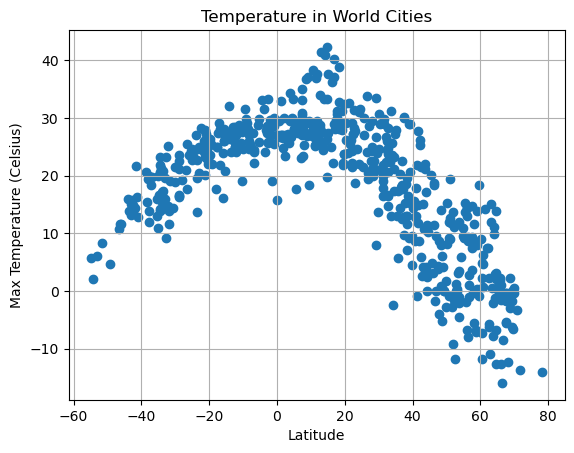

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Latitude'], city_data_df['Max Temp'], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

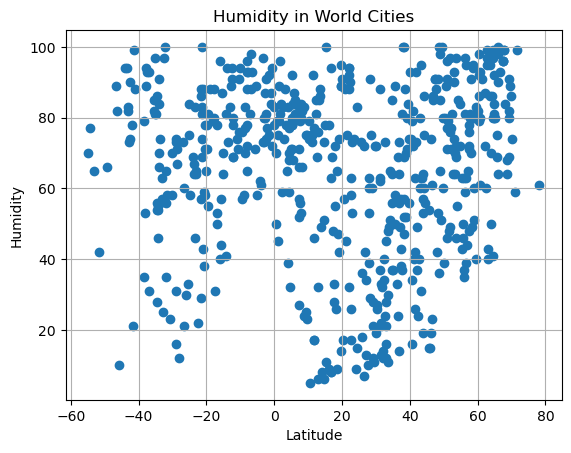

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'], marker="o")

# Incorporate the other graph properties

plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

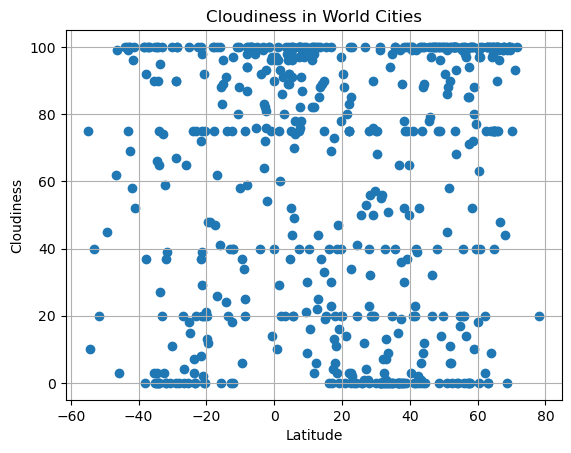

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Latitude'], city_data_df['Cloudiness'], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

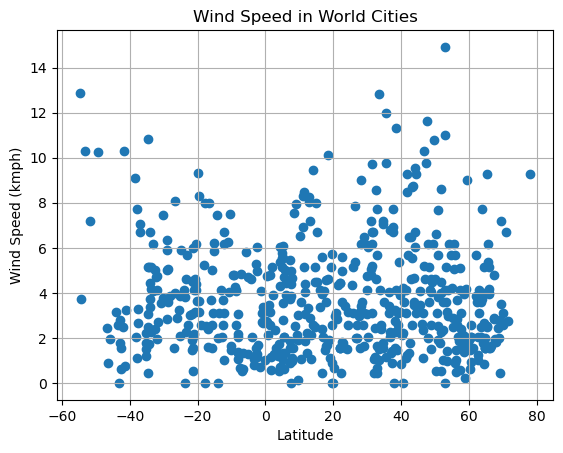

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed'], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (kmph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, y_label, title, corr):

    slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    corr_coeff, p_value = st.pearsonr(x_values, y_values)



    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, color='steelblue')
    plt.plot(x_values,regress_values,"hotpink")
    plt.annotate(line_eq, corr,fontsize=15,color="black")

    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    
    plt.show()
    print(f"Correlation coefficient: {corr_coeff:.2f}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame([city for city in city_data if city['Latitude'] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,16.54,88,75,11.32,PT,1682092687
1,thompson,55.7435,-97.8558,-1.91,46,20,6.17,CA,1682092687
2,hawaiian paradise park,19.5933,-154.9731,22.24,95,20,0.00,US,1682092688
3,at taj,24.2049,23.2857,31.05,9,0,1.50,LY,1682092688
4,ust-nera,64.5667,143.2000,-6.70,97,100,1.87,RU,1682092689


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame([city for city in city_data if city['Latitude'] < 0])

# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,2.06,77,10,3.73,GS,1682092687
1,bredasdorp,-34.5322,20.0403,14.16,54,100,2.50,ZA,1682092688
2,fuerte olimpo,-21.0415,-57.8738,27.13,43,2,2.17,PY,1682092690
3,port-aux-francais,-49.3500,70.2167,4.64,66,45,10.27,TF,1682092690
4,crucecita,-28.9500,-58.9833,23.57,31,67,5.03,AR,1682092691


###  Temperature vs. Latitude Linear Regression Plot

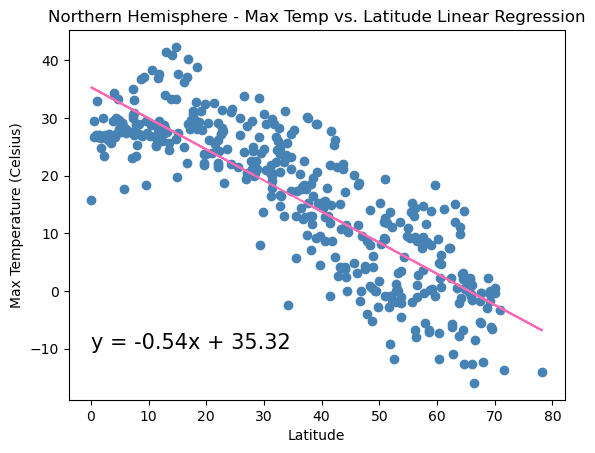

Correlation coefficient: -0.85


In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Max Temp"]
title = "Northern Hemisphere - Max Temp vs. Latitude Linear Regression"
y_label = "Max Temperature (Celsius)"
corr = (0,-10)

plot_linear_regression(x_values, y_values, y_label, title, corr)

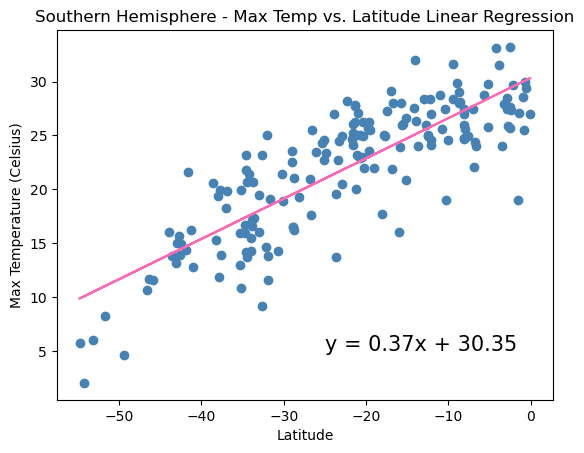

Correlation coefficient: 0.83


In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Max Temp"]
title = "Southern Hemisphere - Max Temp vs. Latitude Linear Regression"
y_label = "Max Temperature (Celsius)"
corr = (-25,5)

plot_linear_regression(x_values, y_values, y_label, title, corr)

**Discussion about the linear relationship:** There is a stong negative linear relationship in the Northern Hemisphere and a strong positive linear relationship in the Southern Hemisphere. Although it will not be exact, you should be able to use this regression to dependbly predict the temp of the the city based on the latitude in both the northern and southern hemishperes.

### Humidity vs. Latitude Linear Regression Plot

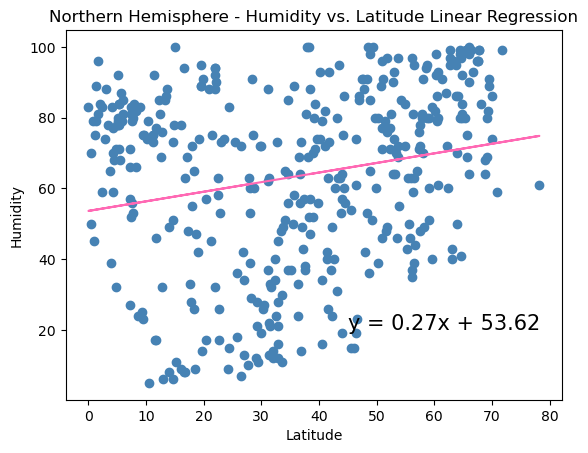

Correlation coefficient: 0.22


In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Humidity"]
title = "Northern Hemisphere - Humidity vs. Latitude Linear Regression"
y_label = "Humidity"
corr = (45,20)

plot_linear_regression(x_values, y_values, y_label, title, corr)

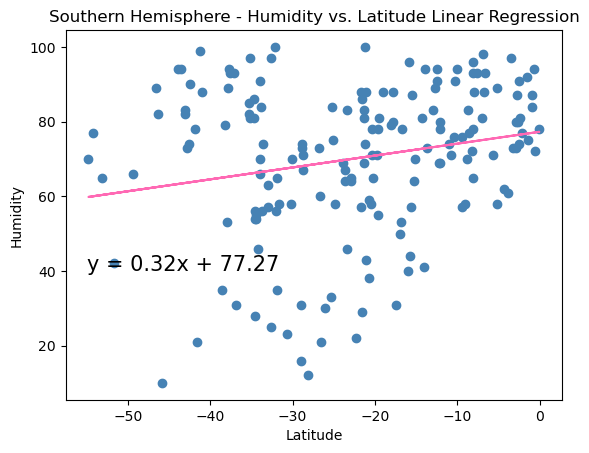

Correlation coefficient: 0.21


In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Humidity"]
title = "Southern Hemisphere - Humidity vs. Latitude Linear Regression"
y_label = "Humidity"
corr = (-55,40)

plot_linear_regression(x_values, y_values, y_label, title, corr)

**Discussion about the linear relationship:** While there is some linear relationship going on here in the Northern Hemisphere, it is weak. In the Southern Hemisphere, it is also weak. It would not rely on either to accurately perdict the humitity based on the city' latitude.

### Cloudiness vs. Latitude Linear Regression Plot

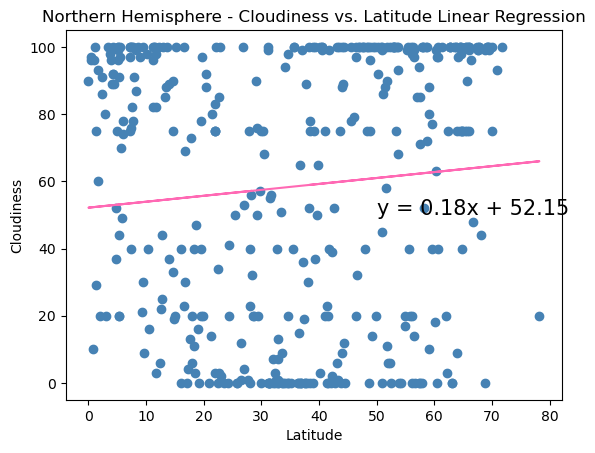

Correlation coefficient: 0.09


In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Cloudiness"]
title = "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression"
y_label = "Cloudiness"
corr = (50,50)

plot_linear_regression(x_values, y_values, y_label, title, corr)

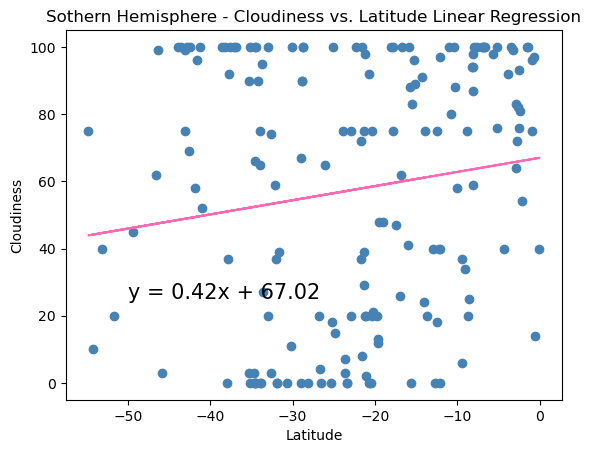

Correlation coefficient: 0.15


In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Cloudiness"]
title = "Sothern Hemisphere - Cloudiness vs. Latitude Linear Regression"
y_label = "Cloudiness"
corr = (-50, 25)

plot_linear_regression(x_values, y_values, y_label, title, corr)

**Discussion about the linear relationship:** According to the correlation coefficient in both the Northern and Southern Hemispheres, there is almost no correlation between the the city's latitude and the cloudiness taken as a whole.

### Wind Speed vs. Latitude Linear Regression Plot

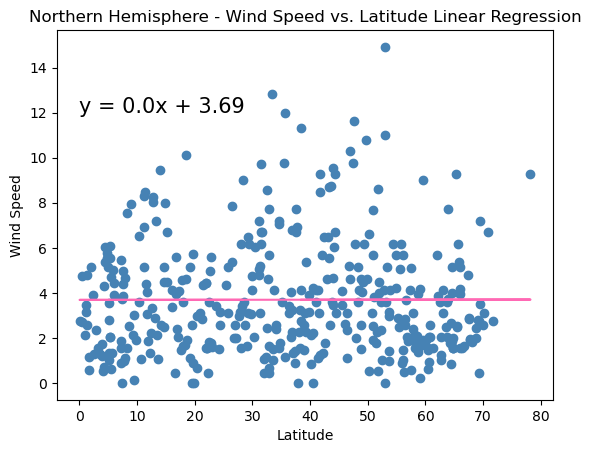

Correlation coefficient: 0.00


In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Wind Speed"]
title = "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression"
y_label = "Wind Speed"
corr = (0,12)

plot_linear_regression(x_values, y_values, y_label, title, corr)

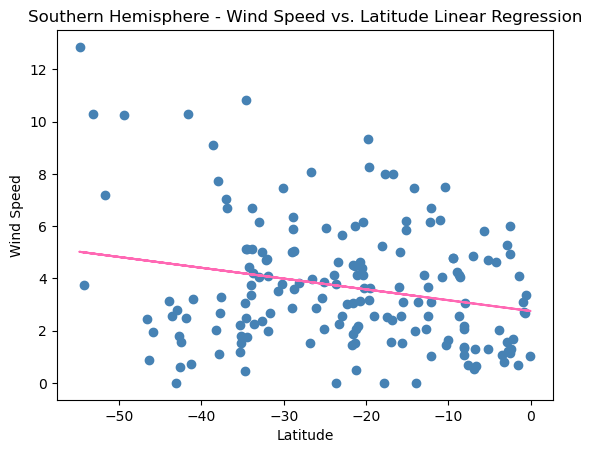

Correlation coefficient: -0.23


In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Wind Speed"]
title = "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression"
y_label = "Wind Speed"
corr = (-50,14)

plot_linear_regression(x_values, y_values, y_label, title, corr)

**Discussion about the linear relationship:** Again, in the Northern Hemishphere, there is no linear relationship between the wind speed and the city's latitude. However, there is a weak correlation in the Southern Hemisphere. That said, I would not use either line to accurately perdict the wind speed in either the Northern or Southern Hemisphere.